<a href="https://colab.research.google.com/github/ojasviashishchauhan/Data-Structures/blob/master/MLUL_ISB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd

# Load the datasets
all_except_last_orders = pd.read_csv('all_except_last_orders.csv')
last_orders_subset = pd.read_csv('last_orders_subset.csv')

# Display the first few rows of each dataset
print(all_except_last_orders.head())
print(last_orders_subset.head())


     Order       SKU   Member Delivery Date             Name
0  8358896  15668375  SSCEHNS      02/11/13  Root Vegetables
1  8358896  15668467  SSCEHNS      02/11/13            Beans
2  8358896  15669863  SSCEHNS      02/11/13        Moong Dal
3  8358896  15669778  SSCEHNS      02/11/13       Other Dals
4  8358896  15669767  SSCEHNS      02/11/13         Urad Dal
     Order       SKU   Member Delivery Date            Name
0  7409204  15669778  SWLCNOE      05/09/13      Other Dals
1  8076206  15669977  SWOEZES      01/04/14         Almonds
2  7560723   7593949  SSWWRHW      30/06/13  Cream Biscuits
3  8362837  15669764  SWLSCOZ      06/11/13           Besan
4  8202458  15670196  SSRCRSO      03/02/14     Organic F&V


In [136]:
all_except_last_orders['Delivery Date'] = pd.to_datetime(all_except_last_orders['Delivery Date'])

min(all_except_last_orders['Delivery Date']) #Timestamp('2012-01-04 00:00:00')

max(all_except_last_orders['Delivery Date']) #Timestamp('2014-12-03 00:00:00')

<ipython-input-136-7b501f132f2b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_except_last_orders['Delivery Date'] = pd.to_datetime(all_except_last_orders['Delivery Date'])


Timestamp('2014-12-03 00:00:00')

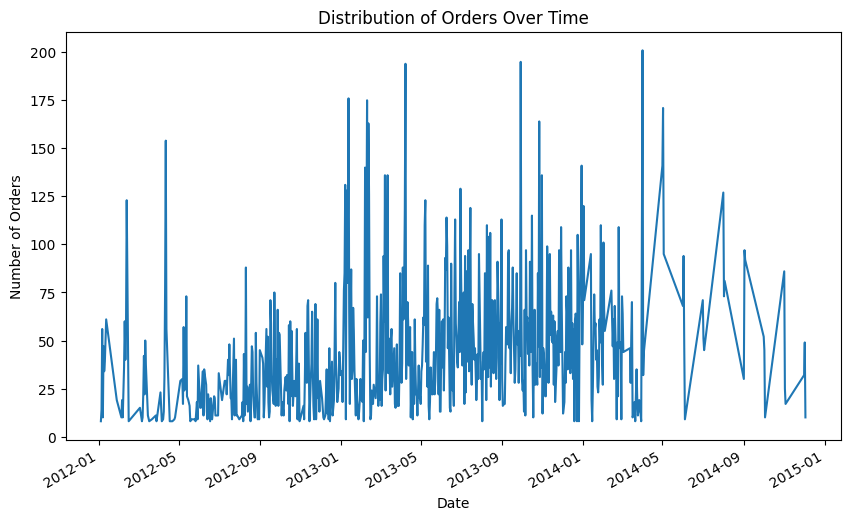

In [137]:
import matplotlib.pyplot as plt

# Convert 'Delivery Date' to datetime
all_except_last_orders['Delivery Date'] = pd.to_datetime(all_except_last_orders['Delivery Date'])

# Plot the distribution of orders over time
plt.figure(figsize=(10, 6))
all_except_last_orders['Delivery Date'].value_counts().sort_index().plot(kind='line')
plt.title('Distribution of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()


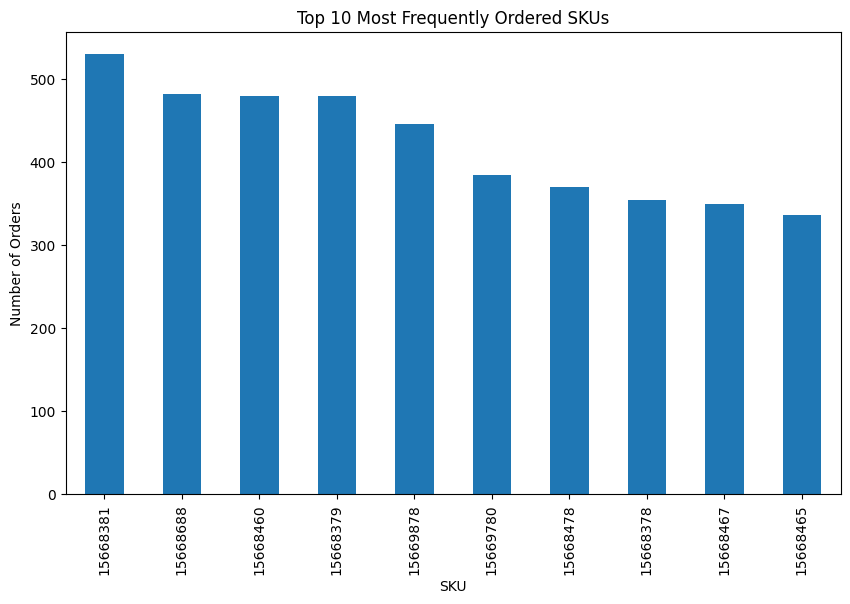

In [138]:
# Plot the top 10 most frequently ordered SKUs
plt.figure(figsize=(10, 6))
all_except_last_orders['SKU'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequently Ordered SKUs')
plt.xlabel('SKU')
plt.ylabel('Number of Orders')
plt.show()


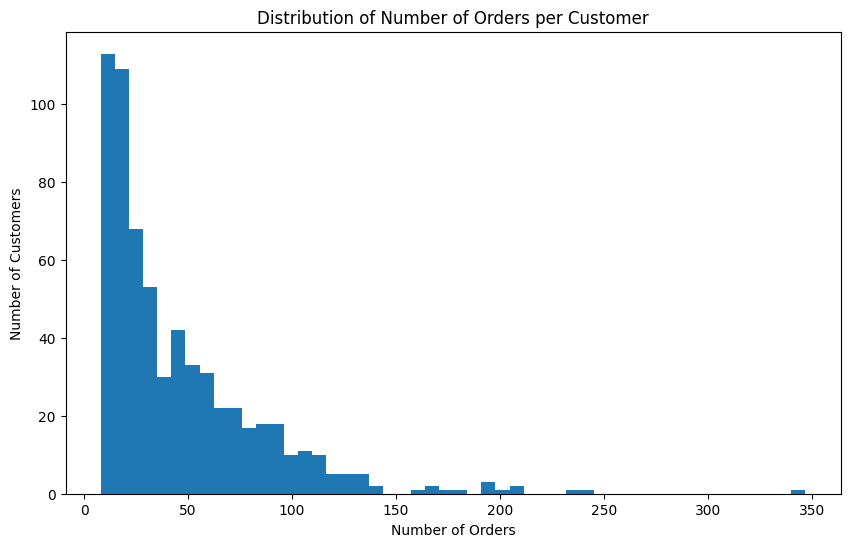

In [139]:
# Plot the distribution of the number of orders per customer
plt.figure(figsize=(10, 6))
all_except_last_orders['Member'].value_counts().plot(kind='hist', bins=50)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-140-947041f5aa1a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pairs_df['Count'], y=pairs_df['Pair'].apply(lambda x: f'{x[0]} & {x[1]}'), palette="viridis")


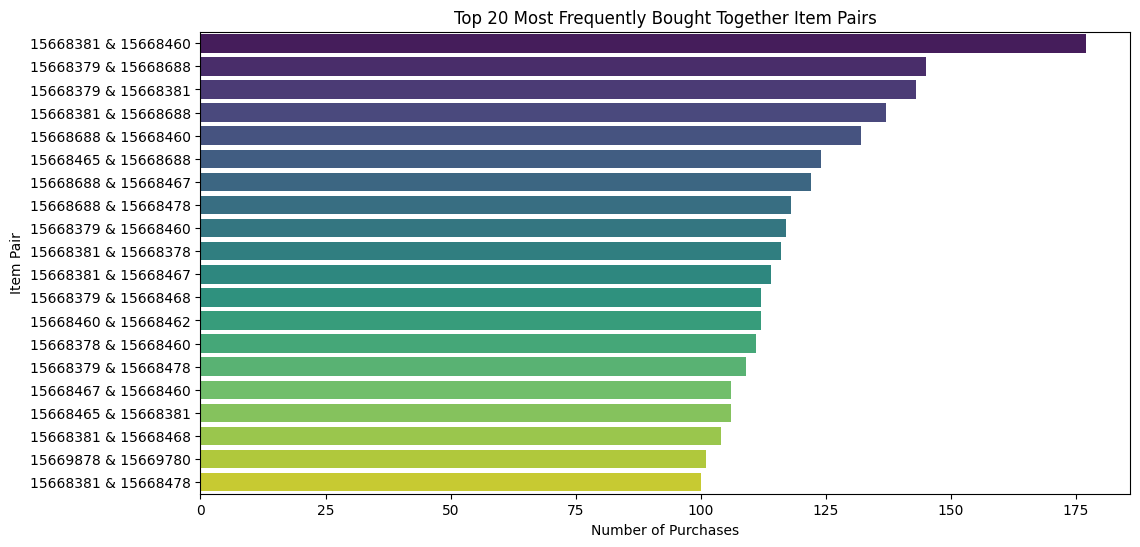

In [140]:
from itertools import combinations
from collections import Counter
import seaborn as sns

# Create a list of orders, where each order is a list of SKUs
orders = all_except_last_orders.groupby('Order')['SKU'].apply(list)

# Count pairs of items
pair_counts = Counter()
for order in orders:
    pair_counts.update(combinations(order, 2))

# Get the 20 most common item pairs
most_common_pairs = pair_counts.most_common(20)

# Create a DataFrame for plotting
pairs_df = pd.DataFrame(most_common_pairs, columns=['Pair', 'Count'])

# Plot the most frequently bought together items
plt.figure(figsize=(12, 6))
sns.barplot(x=pairs_df['Count'], y=pairs_df['Pair'].apply(lambda x: f'{x[0]} & {x[1]}'), palette="viridis")
plt.xlabel('Number of Purchases')
plt.ylabel('Item Pair')
plt.title('Top 20 Most Frequently Bought Together Item Pairs')
plt.show()


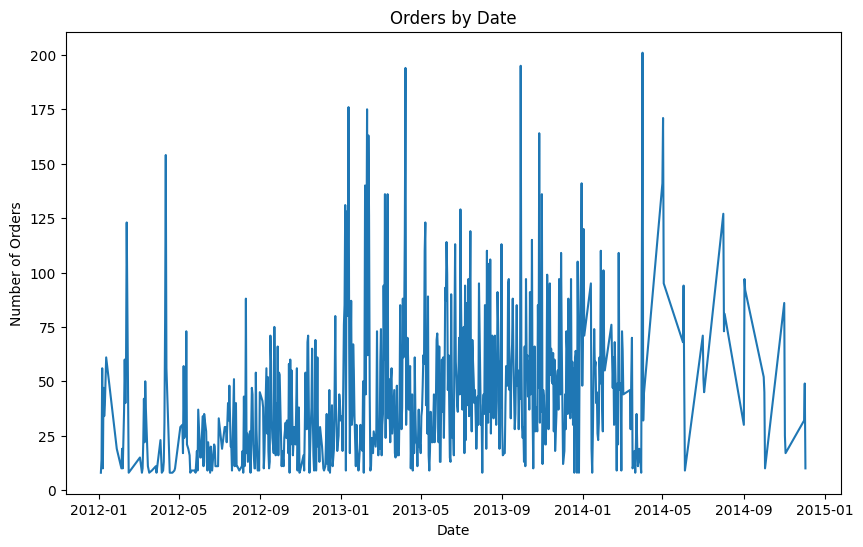

In [141]:
# Group by date and count the number of orders
orders_by_date = all_except_last_orders.groupby(all_except_last_orders['Delivery Date'].dt.date).size()

# Plot orders by date
plt.figure(figsize=(10, 6))
orders_by_date.plot(kind='line')
plt.title('Orders by Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()


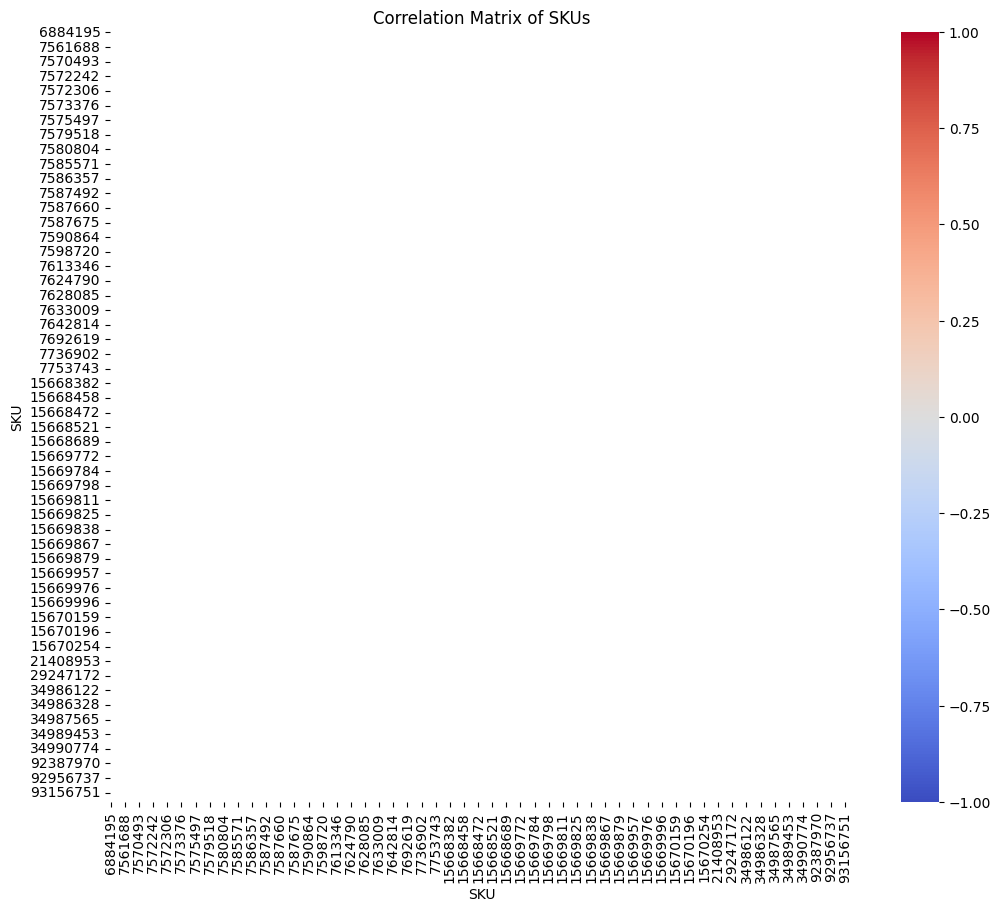

In [142]:
# Create a pivot table to count the occurrences of each SKU in each order
sku_pivot = all_except_last_orders.pivot_table(index='Order', columns='SKU', aggfunc='size', fill_value=0)

# Calculate the correlation matrix
sku_corr = sku_pivot.corr()

# Plot the correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(sku_corr, cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1)
plt.title('Correlation Matrix of SKUs')
plt.show()


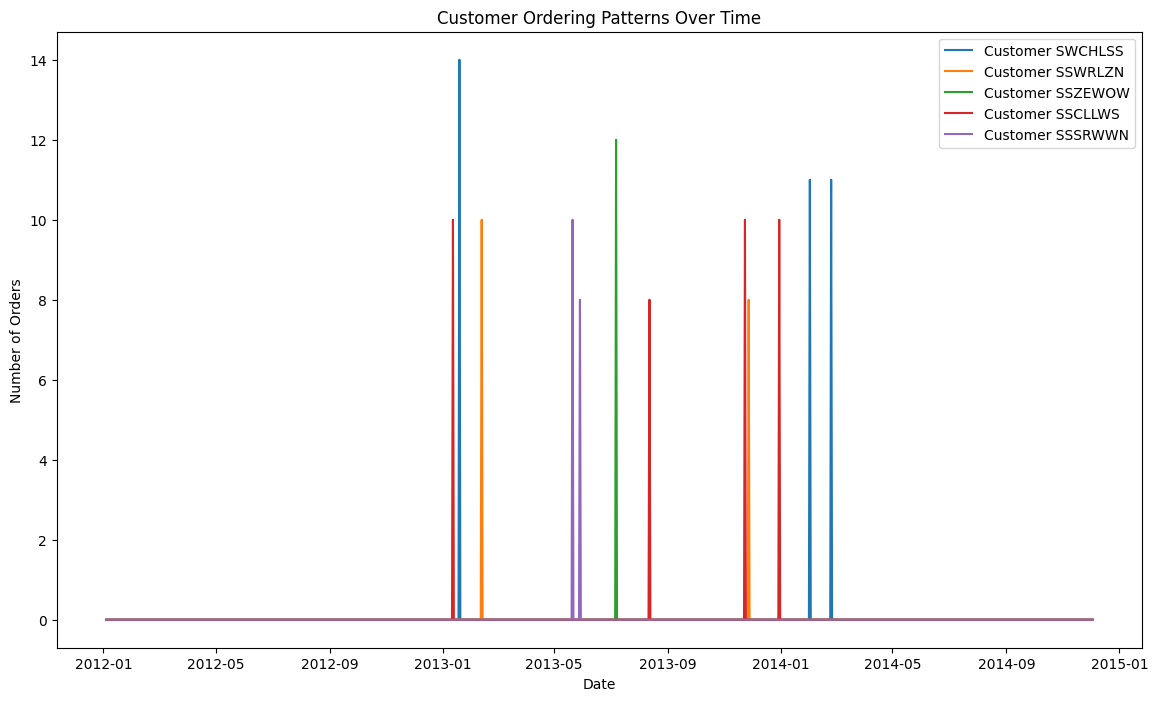

In [143]:
# Group by customer and date to count the number of orders per customer per date
customer_order_patterns = all_except_last_orders.groupby(['Member', all_except_last_orders['Delivery Date'].dt.date]).size().unstack(fill_value=0)

# Plot ordering patterns for a sample of customers
sample_customers = customer_order_patterns.sample(5)

plt.figure(figsize=(14, 8))
for customer in sample_customers.index:
    plt.plot(sample_customers.columns, sample_customers.loc[customer], label=f'Customer {customer}')
plt.title('Customer Ordering Patterns Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()


# More todo in EDA
Add clusting - KMean or DBSCAN
Try Pareto
RFM analysis
Items per order plot
Boxplots
Dendogram/heatmaps


In [144]:
##Problem 1 Recomendation system

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
all_except_last_orders = pd.read_csv('all_except_last_orders.csv')

# Split the dataset into training and testing sets
# We'll use 80% of the data for training and 20% for testing
train_data, test_data = train_test_split(all_except_last_orders, test_size=0.2, random_state=42)

# Save train and test sets
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [146]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Create a user-item matrix for training data
user_item_matrix = train_data.pivot_table(index='Member', columns='SKU', aggfunc='size', fill_value=0)

# Compute the cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Predict the top 5 SKUs for each user in the test set
def recommend_items_user_based(member_id, user_similarity, user_item_matrix, top_n=5):
    user_idx = user_item_matrix.index.get_loc(member_id)
    similar_users = user_similarity[user_idx]
    similar_users_idx = np.argsort(-similar_users)[1:top_n+1]

    recommended_items = user_item_matrix.iloc[similar_users_idx].sum(axis=0).sort_values(ascending=False)
    return recommended_items.index[:top_n].tolist()

# Get recommendations for the test set
test_members = test_data['Member'].unique()
recommendations_user_based = {member: recommend_items_user_based(member, user_similarity, user_item_matrix) for member in test_members}


In [147]:
# Compute the cosine similarity between items
item_similarity = cosine_similarity(user_item_matrix.T)

# Predict the top 5 SKUs for each user in the test set
def recommend_items_item_based(member_id, user_item_matrix, item_similarity, top_n=5):
    member_items = user_item_matrix.loc[member_id]
    member_items_idx = np.where(member_items > 0)[0]

    item_scores = item_similarity[member_items_idx].sum(axis=0)
    recommended_items_idx = np.argsort(-item_scores)[:top_n]

    recommended_items = user_item_matrix.columns[recommended_items_idx]
    return recommended_items.tolist()

# Get recommendations for the test set
recommendations_item_based = {member: recommend_items_item_based(member, user_item_matrix, item_similarity) for member in test_members}


In [148]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendations(true_data, recommendations):
    precisions = []
    recalls = []
    f1_scores = []

    for member in true_data['Member'].unique():
        true_items = true_data[true_data['Member'] == member]['SKU'].tolist()
        pred_items = recommendations.get(member, [])

        if not pred_items:  # If there are no predictions for this member, continue
            continue

        # Convert to sets to find the intersection
        true_set = set(true_items)
        pred_set = set(pred_items)

        intersection_len = len(true_set & pred_set)
        precision = intersection_len / len(pred_set) if pred_set else 0
        recall = intersection_len / len(true_set) if true_set else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    return np.mean(precisions), np.mean(recalls), np.mean(f1_scores)

# Evaluate user-based recommendations
precision_user, recall_user, f1_user = evaluate_recommendations(test_data, recommendations_user_based)
print(f"User-Based Collaborative Filtering - Precision: {precision_user}, Recall: {recall_user}, F1-Score: {f1_user}")

# Evaluate item-based recommendations
precision_item, recall_item, f1_item = evaluate_recommendations(test_data, recommendations_item_based)
print(f"Item-Based Collaborative Filtering - Precision: {precision_item}, Recall: {recall_item}, F1-Score: {f1_item}")

# Choose the best algorithm
if f1_user > f1_item:
    best_algorithm = 'User-Based Collaborative Filtering'
    best_recommendations = recommendations_user_based
else:
    best_algorithm = 'Item-Based Collaborative Filtering'
    best_recommendations = recommendations_item_based

print(f"Best Algorithm: {best_algorithm}")


User-Based Collaborative Filtering - Precision: 0.18122977346278318, Recall: 0.10297437504356326, F1-Score: 0.11706819901597498
Item-Based Collaborative Filtering - Precision: 0.1750809061488673, Recall: 0.0958925809457975, F1-Score: 0.11272838891201314
Best Algorithm: User-Based Collaborative Filtering


In [149]:
import pandas as pd

# Function to recommend items for each member based on the chosen algorithm
def recommend_items_for_member(member_id, best_algorithm, user_similarity, user_item_matrix, item_similarity, top_n=5):
    if member_id not in user_item_matrix.index:
        return []
    if best_algorithm == 'User-Based Collaborative Filtering':
        return recommend_items_user_based(member_id, user_similarity, user_item_matrix, top_n)
    else:
        return recommend_items_item_based(member_id, user_item_matrix, item_similarity, top_n)

# Load the last_orders_subset.csv
last_orders_subset = pd.read_csv('last_orders_subset.csv')


# Generate recommendations for the last orders
final_recommendations = {
    member: recommend_items_for_member(member, best_algorithm, user_similarity, user_item_matrix, item_similarity)
    for member in last_orders_subset['Member'].unique()
}

# Create a list to store the recommendations
recommendations_list = []
nui=1
for member, skus in final_recommendations.items():
    order_id = last_orders_subset[last_orders_subset['Member'] == member]['Order'].iloc[0]
    for sku in skus:
        recommendations_list.append({'ID':nui , 'Order': order_id, 'SKU': sku, 'Member': member })
        nui+=1

# Convert the list to a DataFrame
recommendations_df = pd.DataFrame(recommendations_list)

# Save the recommendations to a CSV file
recommendations_df.to_csv('itembased2.csv', index=False)

print("Final recommendations have been saved to 'GR<n>_rec_5_sets.csv'")


Final recommendations have been saved to 'GR<n>_rec_5_sets.csv'


In [150]:
GR_rec_5_sets = pd.read_csv('itembased2.csv')

# Display the first few rows of each dataset
print(GR_rec_5_sets.head())
print(len(GR_rec_5_sets))

   ID    Order       SKU   Member
0   1  7409204  15668379  SWLCNOE
1   2  7409204  15668478  SWLCNOE
2   3  7409204  15668465  SWLCNOE
3   4  7409204  15668688  SWLCNOE
4   5  7409204  15668468  SWLCNOE
3190


<ipython-input-151-84a64c832ea1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sku_counts.index, y=sku_counts.values, palette="viridis")


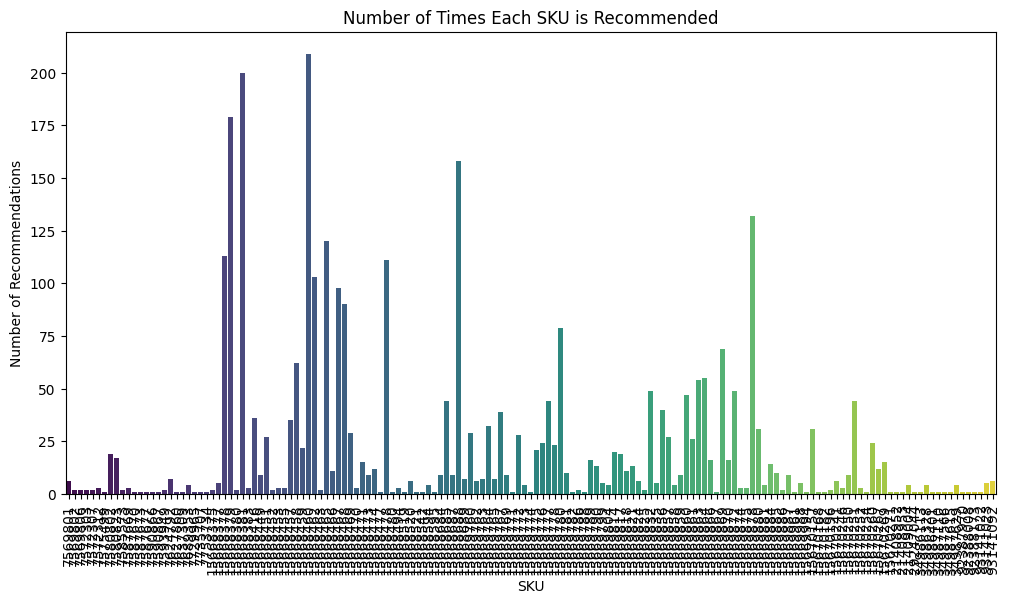

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the recommendations from the CSV file
recommendations_df = pd.read_csv('GR<n>_rec_5_sets.csv')

# Count the number of times each SKU is recommended
sku_counts = recommendations_df['SKU'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=sku_counts.index, y=sku_counts.values, palette="viridis")
plt.xlabel('SKU')
plt.ylabel('Number of Recommendations')
plt.title('Number of Times Each SKU is Recommended')
plt.xticks(rotation=90)
plt.show()


<ipython-input-152-990940d23b80>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_recommendation_counts.index, y=user_recommendation_counts.values, palette="viridis")


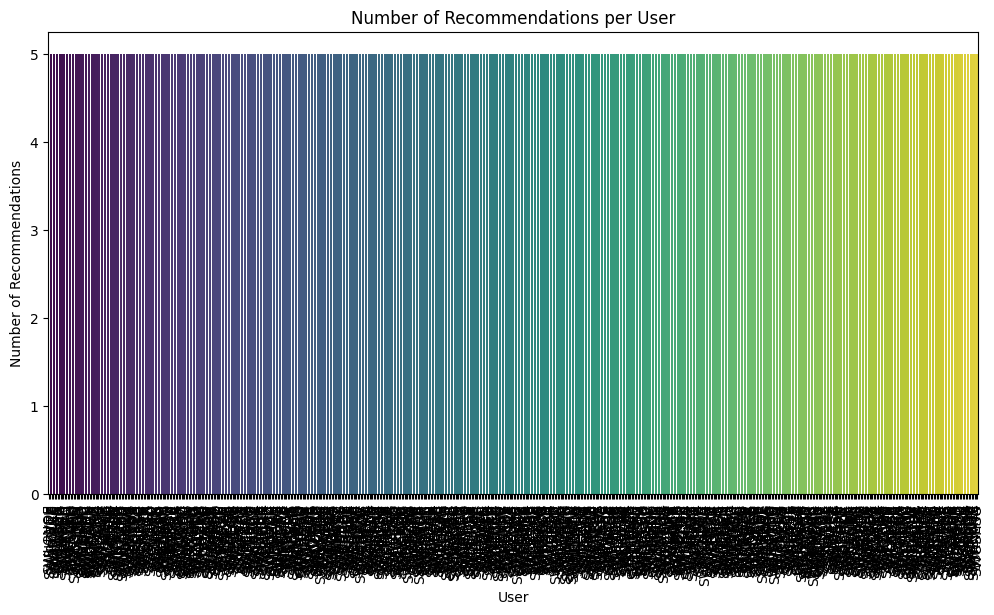

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the recommendations from the CSV file
recommendations_df = pd.read_csv('GR<n>_rec_5_sets.csv')

# Count the number of recommendations for each user
user_recommendation_counts = recommendations_df['Member'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=user_recommendation_counts.index, y=user_recommendation_counts.values, palette="viridis")
plt.xlabel('User')
plt.ylabel('Number of Recommendations')
plt.title('Number of Recommendations per User')
plt.xticks(rotation=90)
plt.show()


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the recommendations from the CSV file
recommendations_df = pd.read_csv('GR<n>_rec_5_sets.csv')

# Count the number of recommendations for each user
user_recommendation_counts = recommendations_df['Member'].value_counts()

# Identify the top 5 users based on the number of recommendations
top_5_users = user_recommendation_counts.nlargest(5)

# Filter the recommendations to include only the top 5 users
top_5_recommendations_df = recommendations_df[recommendations_df['Member'].isin(top_5_users.index)]

print(len(top_5_recommendations_df))

25
